In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.model_selection import *
from google.colab import files, drive, data_table
from google.colab.data_table import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# membaca data .csv untuk dilakukan preparation
df = pd.read_csv('/content/drive/MyDrive/Genetic_Algorithm/df_minmax.csv') 
display(df.describe())

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.534304,0.465120,0.512478,0.439759,0.490913,0.403119,0.517440,0.499689,0.492656,0.384086,0.511921,0.503364,0.505437,0.508441
std,0.254442,0.191464,0.167923,0.224015,0.206150,0.201372,0.279392,0.180136,0.275992,0.252957,0.291318,0.304580,0.294464,0.296713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395018,0.320988,0.375000,0.214286,0.350205,0.242424,0.332065,0.500000,0.248125,0.180980,0.375000,0.375000,0.375000,0.375000
50%,0.524555,0.444444,0.500000,0.428571,0.492476,0.393939,0.601015,0.500000,0.557070,0.343946,0.543451,0.556818,0.537162,0.522059
75%,0.658363,0.592593,0.625000,0.571429,0.610123,0.545455,0.739296,0.500000,0.750135,0.508588,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# memisahkan data untuk training dan testing dari data Normalisasi Untuk masing2 target 
X = df.drop(columns=['CL', 'CD', 'CM25', 'CYAW', 'CROLL', 'CY'])   #Feature Matrix
a = df['CL']          #Target Variable
b = df['CD']          #Target Variable
c = df['CM25']        #Target Variable
d = df['CYAW']        #Target Variable
e = df['CROLL']       #Target Variable
f = df['CY']          #Target Variable
X

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5
...,...,...,...,...,...,...,...,...
576,0.654093,0.592593,0.2500,0.714286,0.325581,0.575758,0.813828,0.5
577,0.661210,0.617284,0.3750,0.714286,0.328317,0.606061,0.845227,0.5
578,0.669751,0.765432,0.8125,0.642857,0.336525,0.636364,0.875040,0.5
579,0.686833,0.617284,0.4375,0.642857,0.344733,0.575758,0.904535,0.5


## **Feature Selection **

# Scoring list : 
[metrics.explained_variance_score](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)

*   ‘max_error’ metrics.max_error
*   ‘neg_mean_absolute_error’ metrics.mean_absolute_error
*   ‘neg_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_root_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_mean_squared_log_error’ metrics.mean_squared_log_error
*   ‘neg_median_absolute_error’ metrics.median_absolute_error
*   ‘r2’ metrics.r2_score
*   ‘neg_mean_poisson_deviance’ metrics.mean_poisson_deviance
*   ‘neg_mean_gamma_deviance’ metrics.mean_gamma_deviance
*   ‘neg_mean_absolute_percentage_error’ 
*   ‘d2_absolute_error_score’
*   ‘d2_pinball_score’ metrics.d2_pinball_score
*   ‘d2_tweedie_score’ metrics.d2_tweedie_score



In [60]:
y = f.astype(float)

#estimators = linear_model.LinearRegression()
#estimators = ExtraTreesRegressor()
estimators = DecisionTreeRegressor()
#estimators = RandomForestRegressor()

report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 

print("Estimator dipakai : ", estimators )
for i in range(1,8):  
  selector = GeneticSelectionCV(estimators,
                                cv = 5,
                                verbose = 1,
                                scoring="r2", 
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.1,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(X, y)
  genfeats = X.columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats: {} of {}, scores : {} " .format(genfeats, selector.n_features_, round(selector.generation_scores_[-1], 3)))

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)

report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Estimator dipakai :  DecisionTreeRegressor()
Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	200   	[-0.395362  1.        0.578735]	[ 0.595336  0.        0.390311]	[-1.452547  1.        0.132067]	[ 0.547016  1.        1.274947]
1  	121   	[-3299.96186      1.14      3300.235331]	[ 4702.153957     0.632772  4701.962024]	[-10000.            0.            0.132067]	[     0.547016      3.        10000.      ]
2  	120   	[-2899.778444     1.18      2900.240994]	[ 4537.762125     0.726361  4537.466504]	[-10000.            0.            0.132067]	[     0.547016      5.        10000.      ]
3  	115   	[-1449.640415     1.09      1450.339929]	[ 3521.156469     0.471063  3520.868393]	[-10000.            0.            0.132067]	[     0.547016      4.        10000.      ]
4  	114   	[-1599.568907     1.16      1600.370427]	[ 3666.248704     0.514198  3665.898889

In [61]:
#Print Reports 
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
DataTable(report)
print("Feature selection recommend:", ga_feats)
print("Estimator : {}, reports : ". format(selector.estimator_))
report

Feature selection recommend: ['P0', 'Q0', 'RHO', 'T0', 'RE', 'ALFA', 'BETA']
Estimator : DecisionTreeRegressor(), reports : 


,No of Feats,Chosen Feats,Scores
6,7,"[P0, Q0, RHO, T0, RE, ALFA, BETA]",0.831
5,6,"[P0, Q0, T0, RE, ALFA, BETA]",0.829
4,5,"[P0, T0, RE, ALFA, BETA]",0.825
3,4,"[P0, T0, ALFA, BETA]",0.807
1,2,"[ALFA, BETA]",0.761
2,2,"[ALFA, BETA]",0.761
0,1,[BETA],0.547


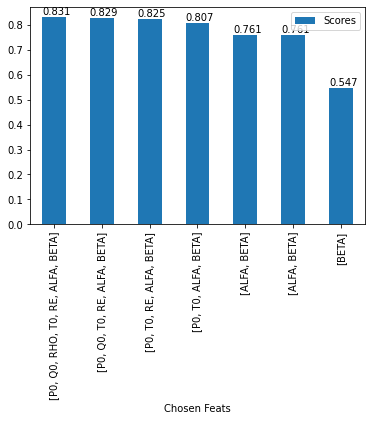

In [66]:
# Plot feature score 
y = np.round(report["Scores"], 3)
report.plot(kind='bar',x='Chosen Feats',y='Scores')
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))